<a href="https://colab.research.google.com/github/ngupta23/ds7337_nlp/blob/master/code/week1_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.regularizers import l2
from sklearn import datasets
import pandas as pd
import numpy as np
print(tf.__version__)

2.2.0-rc4


## Load Data
First get the data.  Sklearn presents the data in a dictionary.  

The target is the price is thousands

Note that X is a dataframe while y is an array!!

In [0]:
bos = datasets.load_boston()

In [3]:
bos

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [0]:
x = pd.DataFrame(bos['data'])

In [0]:
x.columns=bos['feature_names']

In [6]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
y = bos['target']

In [8]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Scale Data

Neural Networks are especially sensitive do data scaling.  Nearly all the activation functions saturate at (0,1) or (-1,1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(x)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[12], scaler.min_[12]))
multiplied_by = scaler.scale_[12]
added = scaler.min_[12]

scaled_train_df = pd.DataFrame(scaled_train, columns=x.columns.values)

Note: median values were scaled by multiplying by 0.0275938190 and adding -0.047737


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

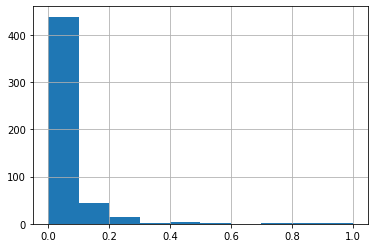

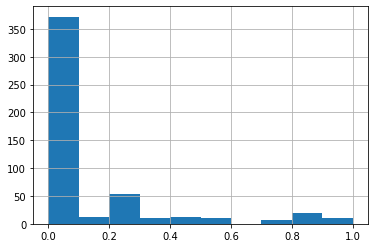

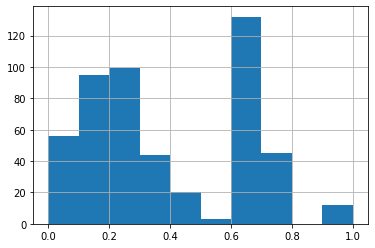

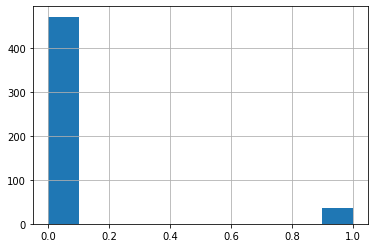

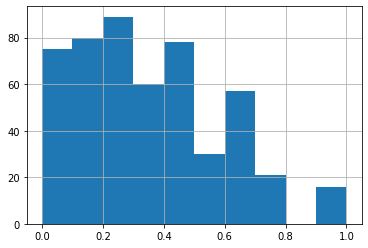

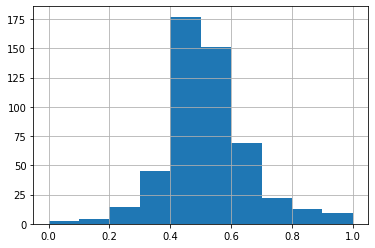

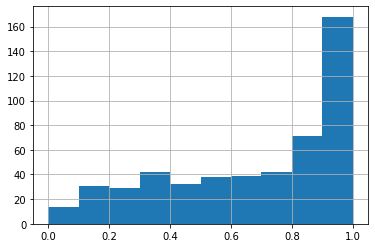

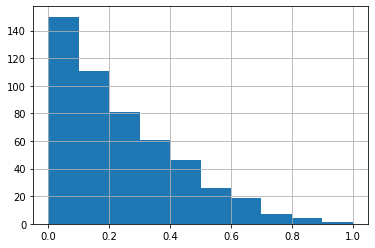

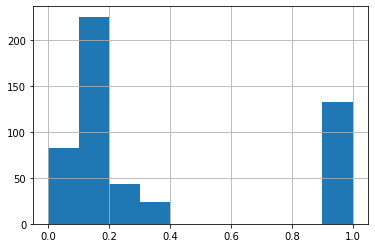

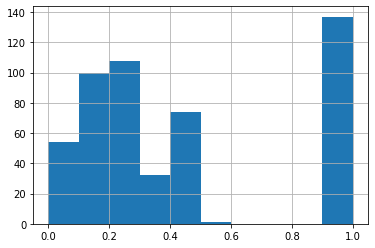

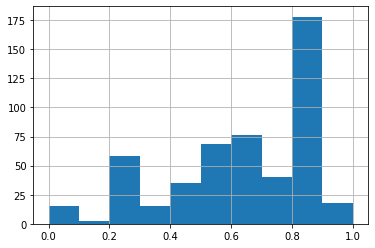

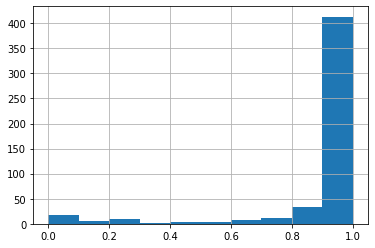

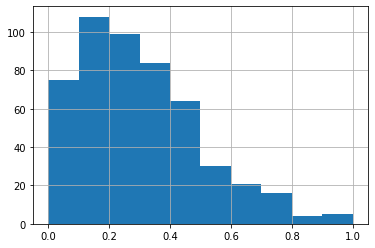

In [11]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

## Model 
Alright lets get down to business.  We will use the Sequential() class to build a model.  This means we just add layer after layer to the model (in order).

Note that this is NOT the keras package proper.  This is an implementation of the Keras API in tensorflow.  THey are closely related, but this IS Tensorflow (package), not Keras (package)

In [12]:
x.shape

(506, 13)

In [0]:
model = tf.keras.Sequential()
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(1))

## Compile Model

The compile step adds an optimizer (solver) and your loss metrics.

In [0]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

## Fit model
Now it is time to train

In [15]:
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [16]:
model.fit(scaled_train_df.values, y, epochs=10, batch_size=32)

Epoch 1/10
16/16 [==============================] - 0s 6ms/step - loss: 130.3889 - mean_squared_error: 130.3889
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 74.9332 - mean_squared_error: 74.9332
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 67.2922 - mean_squared_error: 67.2922
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 62.5452 - mean_squared_error: 62.5452
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 59.0551 - mean_squared_error: 59.0551
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 55.4928 - mean_squared_error: 55.4928
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 52.4184 - mean_squared_error: 52.4184
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 50.3054 - mean_squared_error: 50.3054
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 48.1511 - mean_squared_error: 48.1511
Epoch 10

## Visualize that data
Tensorboard allows you to look at your training curves in real time.  All we need to do here is add a "callback" that is executed every epoch end.  Tensorboard writes a summary of the model output.  If you manually build a neural network, you need to add tf.summary operations.

To run tensorboard type

`tensorboard --logdir logs`

Then go to localhost:6006 in your web browser

In [0]:
from time import time
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
tb = TensorBoard(log_dir=f"logs\\{time()}")
es = EarlyStopping(min_delta=0,patience=10)

In [0]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [20]:
model.fit(scaled_train_df.values, y, epochs=20, batch_size=4, callbacks=[tb, es])

Epoch 1/20
127/127 [==============================] - 0s 3ms/step - loss: 22.6977 - mean_squared_error: 22.6977
Epoch 2/20
127/127 [==============================] - 0s 3ms/step - loss: 22.6290 - mean_squared_error: 22.6290
Epoch 3/20
127/127 [==============================] - 0s 2ms/step - loss: 21.4042 - mean_squared_error: 21.4042
Epoch 4/20
127/127 [==============================] - 0s 2ms/step - loss: 20.6604 - mean_squared_error: 20.6604
Epoch 5/20
127/127 [==============================] - 0s 3ms/step - loss: 21.6169 - mean_squared_error: 21.6169
Epoch 6/20
127/127 [==============================] - 0s 2ms/step - loss: 19.7983 - mean_squared_error: 19.7983
Epoch 7/20
127/127 [==============================] - 0s 2ms/step - loss: 20.6967 - mean_squared_error: 20.6967
Epoch 8/20
127/127 [==============================] - 0s 3ms/step - loss: 20.5342 - mean_squared_error: 20.5342
Epoch 9/20
127/127 [==============================] - 0s 2ms/step - loss: 20.6684 - mean_squared_error: 

## Validate!!
SO far we have used the entire dataset to train.  We know that Prof Slater frowns upon this.  In Neural Networks, ratter than a cross validation, a validation split is done.  Lets repeat the experiment with splits


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=1776)

In [26]:
print(type(x_train), type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [0]:
model_final = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
model_final.add(layers.Dense(100, activation='sigmoid'))
model_final.add(layers.Dense(100, activation='sigmoid'))
model_final.add(layers.Dense(1))

In [0]:
model_final.compile(optimizer=tf.optimizers.SGD(0.001),
                    loss='mean_squared_error',
                    metrics=['mean_squared_error'])

In [28]:
out = model_final.fit(x_train.values, y_train, validation_data=(x_test.values,y_test), epochs=1000, batch_size=10,callbacks=[tb,es])

Epoch 1/1000
41/41 [==============================] - 0s 10ms/step - loss: 169.3151 - mean_squared_error: 169.3151 - val_loss: 87.9540 - val_mean_squared_error: 87.9540
Epoch 2/1000
41/41 [==============================] - 0s 3ms/step - loss: 84.1466 - mean_squared_error: 84.1466 - val_loss: 87.7389 - val_mean_squared_error: 87.7389
Epoch 3/1000
41/41 [==============================] - 0s 4ms/step - loss: 83.8171 - mean_squared_error: 83.8171 - val_loss: 87.8447 - val_mean_squared_error: 87.8447
Epoch 4/1000
41/41 [==============================] - 0s 4ms/step - loss: 83.8822 - mean_squared_error: 83.8822 - val_loss: 86.6929 - val_mean_squared_error: 86.6929
Epoch 5/1000
41/41 [==============================] - 0s 4ms/step - loss: 83.4028 - mean_squared_error: 83.4028 - val_loss: 87.8359 - val_mean_squared_error: 87.8359
Epoch 6/1000
41/41 [==============================] - 0s 4ms/step - loss: 82.9259 - mean_squared_error: 82.9259 - val_loss: 88.7577 - val_mean_squared_error: 88.7577
E

## Classification?
The only thing we really need to change is the final layer to predict classes

In [0]:
model_iris = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:

model_iris.add(layers.Dense(100, activation='sigmoid'))
model_iris.add(layers.Dense(100, activation='sigmoid'))
model_iris.add(layers.Dense(3 ,activation='sigmoid'))

model_iris.compile(optimizer=tf.optimizers.SGD(0.01),
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # use this when classification label is an integer 
                   metrics=['accuracy'])

In [0]:
iris = datasets.load_iris()

In [0]:
x= iris['data']
y = iris['target']
# Why do I not have to scale?
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1776)

In [35]:
y_train.shape

(120,)

In [36]:
y_train[0]

1

In [32]:
model_iris.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=4, callbacks=[tb])

Epoch 1/100
30/30 [==============================] - 0s 7ms/step - loss: 1.1143 - accuracy: 0.2833 - val_loss: 1.0985 - val_accuracy: 0.3667
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 1.1091 - accuracy: 0.2750 - val_loss: 1.0997 - val_accuracy: 0.4000
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 1.1034 - accuracy: 0.3000 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 1.1004 - accuracy: 0.3000 - val_loss: 1.0962 - val_accuracy: 0.6333
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 1.0996 - accuracy: 0.3167 - val_loss: 1.0958 - val_accuracy: 0.4333
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 1.0988 - accuracy: 0.4000 - val_loss: 1.0954 - val_accuracy: 0.3667
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 1.0979 - accuracy: 0.3250 - val_loss: 1.0931 - val_accuracy: 0.3000
Epoch 8/100
3

In [33]:
model_iris.predict(x_test)

array([[0.00089048, 0.04453431, 0.0761577 ],
       [0.0025684 , 0.0376936 , 0.03243794],
       [0.20114733, 0.01799957, 0.00084628],
       [0.00207445, 0.03900737, 0.03874449],
       [0.00196635, 0.03982944, 0.04048265],
       [0.00328603, 0.03625872, 0.02710748],
       [0.0056806 , 0.03353622, 0.01732939],
       [0.00139786, 0.04175301, 0.05350514],
       [0.01427194, 0.02889436, 0.00817216],
       [0.00134487, 0.04230923, 0.05491912],
       [0.00600916, 0.03302555, 0.01651006],
       [0.21872716, 0.01771751, 0.00078642],
       [0.19271204, 0.01816394, 0.00087785],
       [0.16205989, 0.01870596, 0.00102831],
       [0.00122061, 0.04267567, 0.05912831],
       [0.00121458, 0.04291661, 0.06016897],
       [0.21847238, 0.01806111, 0.00078643],
       [0.00594259, 0.03338749, 0.01668884],
       [0.13519074, 0.01956084, 0.00122592],
       [0.00135521, 0.04199515, 0.05497349],
       [0.13686024, 0.01916359, 0.00123475],
       [0.20863348, 0.01801193, 0.00081007],
       [0.

In [34]:
np.argmax(model_iris.predict(x_test),axis=1)

array([2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0,
       0, 1, 0, 1, 2, 2, 2, 0])

In [37]:
y_test

array([2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0,
       0, 1, 0, 1, 2, 2, 2, 0])

In [0]:
data = datasets.load_digits()

In [39]:
data['data'][1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [40]:
data['images'][1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [41]:
data['target'][0:30]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9])